In [1]:
# For division
from __future__ import division
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from scipy.stats import pearsonr

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as pdr

# For time stamps
from datetime import datetime



In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)

In [3]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-22,214.440002,210.750000,213.190002,212.460007,22253700.0,210.372726
2019-08-23,212.050003,201.000000,209.429993,202.639999,46818000.0,200.649200
2019-08-26,207.190002,205.059998,205.860001,206.490005,26043600.0,204.461349
2019-08-27,208.550003,203.529999,207.860001,204.160004,25873300.0,202.154251
2019-08-28,205.720001,203.320007,204.100006,205.529999,15938800.0,203.510803


In [4]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,300.686759,293.508854,296.659802,297.559051,3.641286e+07,296.126848
std,62.878140,61.269758,61.829694,62.384124,1.745872e+07,62.895670
min,205.720001,201.000000,204.100006,202.639999,1.165440e+07,200.649200
25%,257.850006,248.000000,250.750000,254.289993,2.505160e+07,253.147079
50%,289.980011,282.920013,284.820007,288.079987,3.168580e+07,286.785187
75%,324.649994,318.950012,322.630005,323.339996,4.199410e+07,321.739899
max,499.470001,477.000000,477.049988,497.480011,1.067212e+08,497.480011


<AxesSubplot:xlabel='Date'>

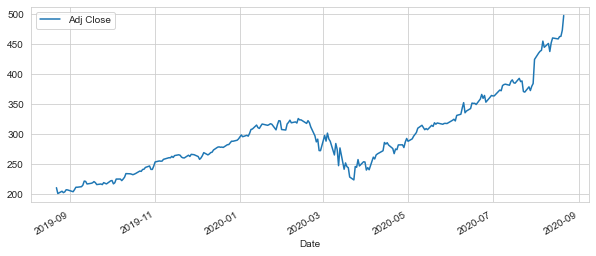

In [5]:
AAPL['Adj Close'].plot(legend=True, figsize=(10, 4))

<AxesSubplot:xlabel='Date'>

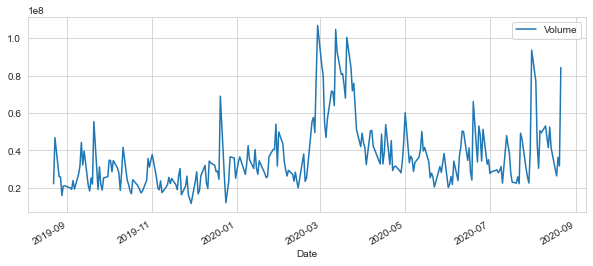

In [6]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

In [8]:
AAPL

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2019-08-22,214.440002,210.750000,213.190002,212.460007,22253700.0,210.372726,NaN,NaN,NaN
2019-08-23,212.050003,201.000000,209.429993,202.639999,46818000.0,200.649200,NaN,NaN,NaN
2019-08-26,207.190002,205.059998,205.860001,206.490005,26043600.0,204.461349,NaN,NaN,NaN
2019-08-27,208.550003,203.529999,207.860001,204.160004,25873300.0,202.154251,NaN,NaN,NaN
2019-08-28,205.720001,203.320007,204.100006,205.529999,15938800.0,203.510803,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-17,464.350006,455.850006,464.250000,458.429993,29890400.0,458.429993,449.511819,419.249736,385.952380
2020-08-18,464.000000,456.029999,457.410004,462.250000,26408400.0,462.250000,451.949768,422.997151,388.540184
2020-08-19,468.649994,462.440002,463.929993,462.829987,36384500.0,462.829987,454.287003,426.719164,390.929366


<AxesSubplot:xlabel='Date'>

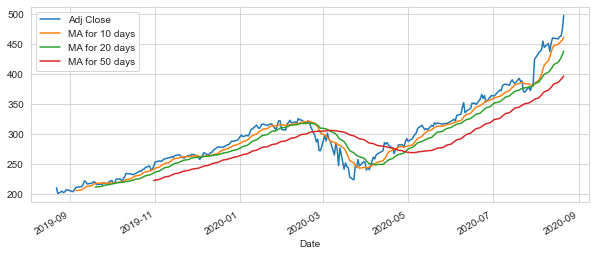

In [9]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [10]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

<AxesSubplot:xlabel='Date'>

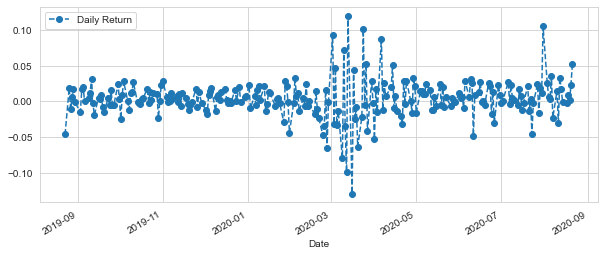

In [11]:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

<AxesSubplot:xlabel='Daily Return'>

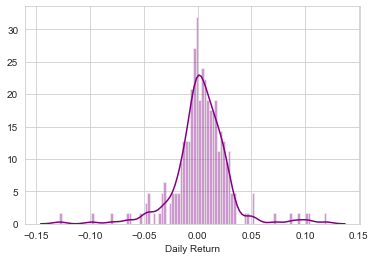

In [12]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [13]:
closing_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']

In [14]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-08-22,210.372726,1189.530029,136.229080,1804.660034
2019-08-23,200.649200,1151.290039,131.888504,1749.619995
2019-08-26,204.461349,1168.890015,133.925323,1768.869995
2019-08-27,202.154251,1167.839966,134.212051,1761.829956
2019-08-28,203.510803,1171.020020,134.034073,1764.250000


In [15]:
tech_rets = closing_df.pct_change()

In [16]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-08-22,NaN,NaN,NaN,NaN
2019-08-23,-0.046220,-0.032147,-0.031862,-0.030499
2019-08-26,0.018999,0.015287,0.015443,0.011002
2019-08-27,-0.011284,-0.000898,0.002141,-0.003980
2019-08-28,0.006710,0.002723,-0.001326,0.001374


C:\Users\saura\Anaconda3\envs\ml\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


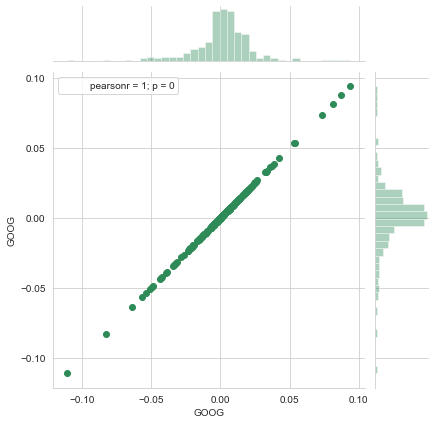

In [17]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen', stat_func=pearsonr)

C:\Users\saura\Anaconda3\envs\ml\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


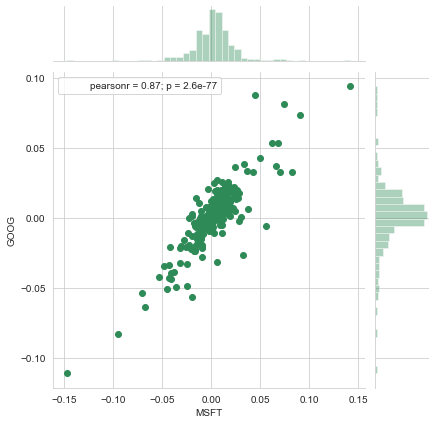

In [18]:
sns.jointplot('MSFT', 'GOOG', tech_rets, kind='scatter', color='seagreen', stat_func=pearsonr)

C:\Users\saura\Anaconda3\envs\ml\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


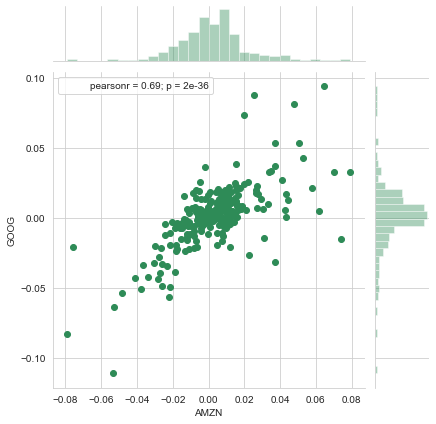

In [19]:
sns.jointplot('AMZN', 'GOOG', tech_rets, kind='scatter', color='seagreen', stat_func=pearsonr)

C:\Users\saura\Anaconda3\envs\ml\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


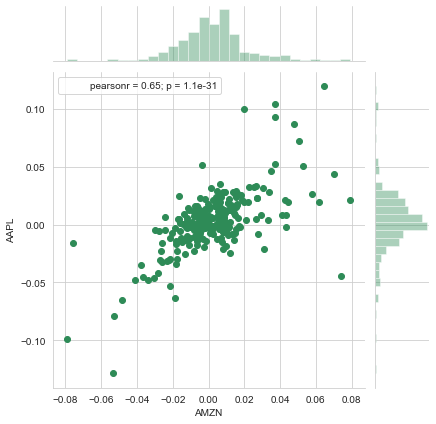

In [20]:
sns.jointplot('AMZN', 'AAPL', tech_rets, kind='scatter', color='seagreen', stat_func=pearsonr)

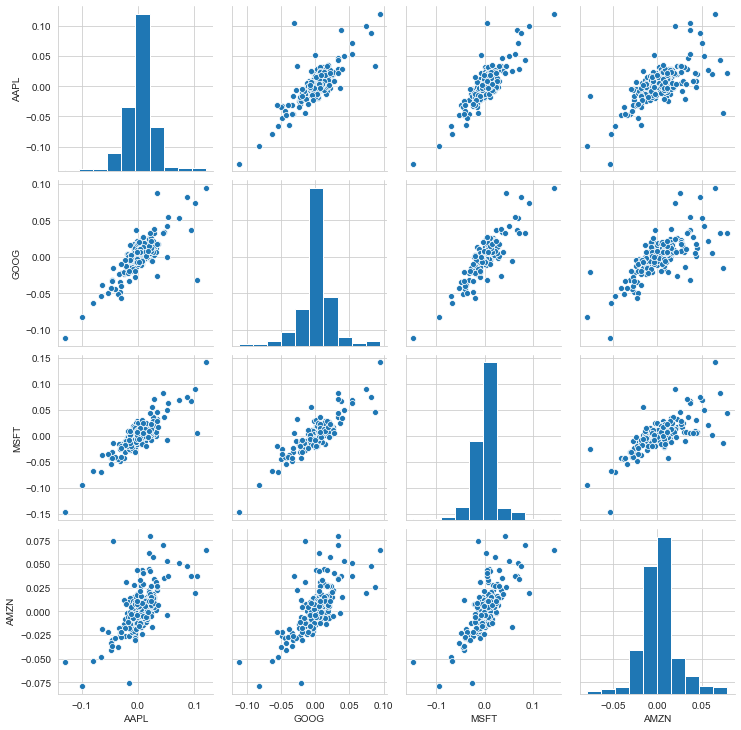

In [21]:
sns.pairplot(tech_rets.dropna())

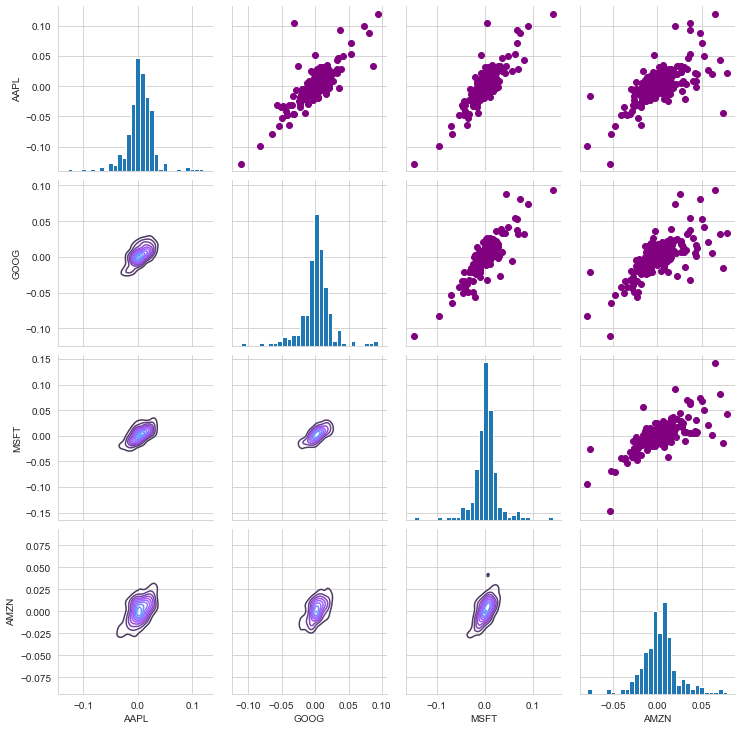

In [22]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

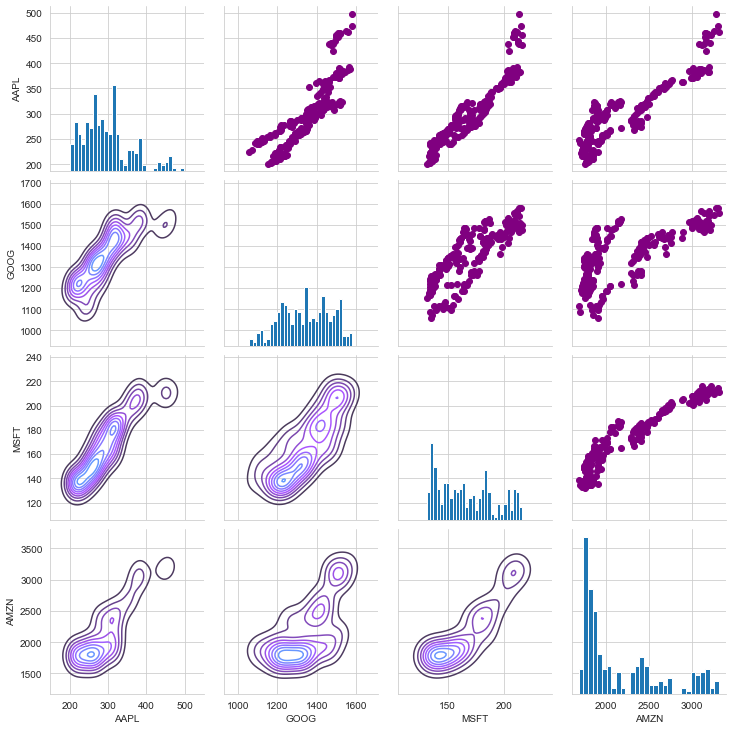

In [23]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

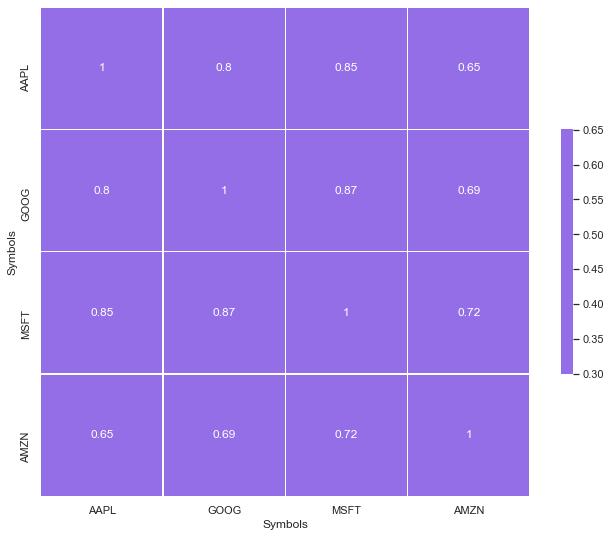

In [36]:
# Compute the correlation matrix
corr = tech_rets.corr()

#mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=.3, center=0, annot=True, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

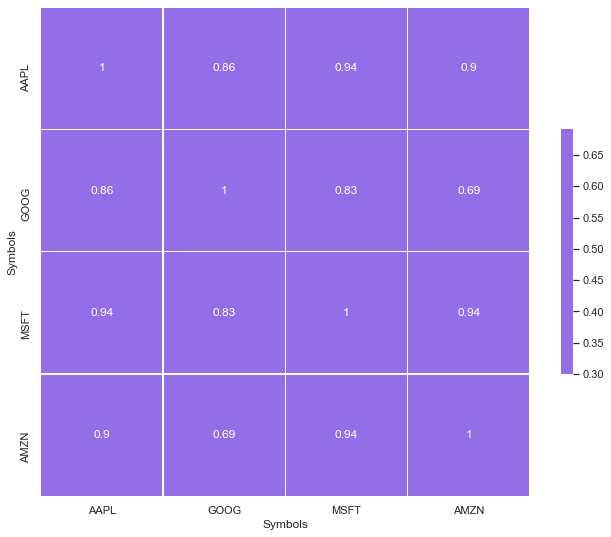

In [37]:
# Compute the correlation matrix
corr = closing_df.corr()

#mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=.3, center=0, annot=True, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [38]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


Symbols,AAPL,GOOG,MSFT,AMZN
Symbols,,,,
AAPL,1.00,0.86,0.94,0.90
GOOG,0.86,1.00,0.83,0.69
MSFT,0.94,0.83,1.00,0.94
AMZN,0.90,0.69,0.94,1.00


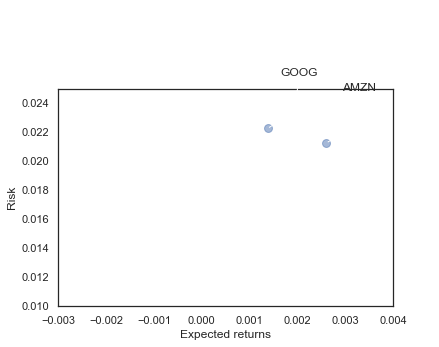

In [39]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

<AxesSubplot:xlabel='Daily Return'>

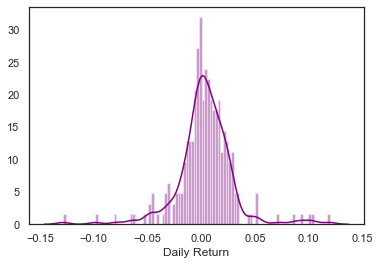

In [40]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [41]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.03425842644096377

In [42]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [45]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

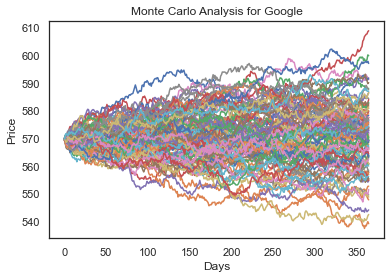

In [46]:
# Get start price from GOOG.head()
start_price = 569.85

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [48]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

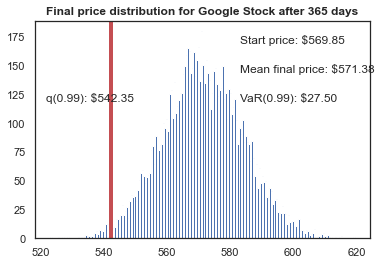

In [49]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');